In [1]:
import json
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import QuantileTransformer

In [2]:
class FeatureEngineering:
    def __init__(self, log_file_path):
        self.df = pd.read_json(log_file_path)
        self.df['metrics'] = self.df['metrics'].fillna("{}")

    def get_cpu_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['cpu'].keys():
                return round(median(col_value['cpu']['one_hour']['cpu_one_hour']), 4)
        except (KeyError, TypeError):
            pass
        return None

    def get_memory_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['memory'].keys():
                return round(median(col_value['memory']['one_hour']['memory_one_hour_data']))
        except (KeyError, TypeError):
            pass
        return None

    def get_download_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['download'].keys():
                if isinstance(col_value['download']['one_hour']['download_one_hour_data'][0], dict):
                    temp_list = []
                    for val in col_value['download']['one_hour']['download_one_hour_data']:
                        if isinstance(val, int):
                            temp_list.append(val)
                        else:
                            temp_list.append(int(val["$numberLong"]))
                    return round(median(temp_list))
                else:
                    try:
                        return median(col_value['download']['one_hour']['download_one_hour_data'])
                    except (KeyError, TypeError, ValueError):
                        temp_list = []
                        for val in col_value['download']['one_hour']['download_one_hour_data']:
                            if isinstance(val, int):
                                temp_list.append(val)
                            else:
                                temp_list.append(int(val["$numberLong"]))
                        return median(temp_list)
        except (KeyError, TypeError):
            pass
        return None

    def get_upload_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['upload'].keys():
                return round(median(col_value['upload']['one_hour']['upload_one_hour_time']), 4)
        except (KeyError, TypeError):
            pass
        return None

    def get_pid_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['pids'].keys():
                return round(median(col_value['pids']['one_hour']['one_hour']))
        except (KeyError, TypeError):
            pass
        return None

    def get_read_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['read'].keys():
                return round(median(col_value['read']['one_hour']['read_one_hour_data']))
        except (KeyError, TypeError):
            pass
        return None

    def get_write_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['write'].keys():
                return round(median(col_value['write']['one_hour']['write_one_hour_data']))
        except (KeyError, TypeError):
            pass
        return None
    def transformed_data(self):
        new_cols = [""]
        self.df['actual_cpu_usage'] = self.df['metrics'].map(self.get_cpu_stats)
        self.df['actual_memory_usage'] = self.df['metrics'].map(self.get_memory_stats)
        self.df['actual_download_usage'] = self.df['metrics'].map(self.get_download_stats)
        self.df['actual_upload_usage'] = self.df['metrics'].map(self.get_upload_stats)
        self.df['actual_pid_usage'] = self.df['metrics'].map(self.get_pid_stats)

        df_trans = self.df[['user', 'actual_cpu_usage', 'actual_memory_usage', 'actual_download_usage',
                            'actual_upload_usage', 'actual_pid_usage', 'last_update_time']]
        df_trans['time'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[1]
        df_trans['date'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[0]
        df_trans['hour'] = df_trans['last_update_time'].dt.hour
        df_trans['last_update_time'] = pd.to_datetime(df_trans['last_update_time'])

        df_trans['rank'] = df_trans.groupby(["date", 'hour'])["time"].rank(method="dense", ascending=False)
        df_trans_filtered = df_trans[df_trans['rank'] == 1]
        return df_trans_filtered
log_processor = FeatureEngineering("selfmadelabs.labsusagelog.json")
filtered_logs = log_processor.transformed_data()
print(filtered_logs.to_string(index=False))

    


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\1617886700.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['time'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[1]
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\1617886700.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['date'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[0]
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\1617886700.py:91: SettingWithCopyWarning: 
A value is try

                                    user  actual_cpu_usage  actual_memory_usage  actual_download_usage  actual_upload_usage  actual_pid_usage              last_update_time     time       date  hour  rank
                   sibi.nandhu@gmail.com            0.0001          113246208.0           2.280000e+07         1.662081e+09              23.0 2022-09-02 01:38:10.270646016 01:38:19 2022-09-02   1.0   1.0
              mspraveenkumar77@gmail.com            0.0000            5713690.0           9.440000e+07         1.662089e+09              13.0 2022-09-02 03:53:30.247668224 03:53:37 2022-09-02   3.0   1.0
                    manuarul27@gmail.com            0.0000            5717884.0           9.580000e+07         1.662092e+09              13.0 2022-09-02 04:45:40.392014592 04:45:54 2022-09-02   4.0   1.0
                 askarhaji2018@gmail.com            0.0001           19304284.0           2.140000e+07         1.662082e+09              19.0 2022-09-02 02:04:00.563477248 04:54:38 202

In [3]:
filtered_logs.head()

,user,actual_cpu_usage,actual_memory_usage,actual_download_usage,actual_upload_usage,actual_pid_usage,last_update_time,time,date,hour,rank
1,sibi.nandhu@gmail.com,0.0001,113246208.0,22800000.0,1.662081e+09,23.0,2022-09-02 01:38:10.270646016,01:38:19,2022-09-02,1.0,1.0
5,mspraveenkumar77@gmail.com,0.0000,5713690.0,94400000.0,1.662089e+09,13.0,2022-09-02 03:53:30.247668224,03:53:37,2022-09-02,3.0,1.0
8,manuarul27@gmail.com,0.0000,5717884.0,95800000.0,1.662092e+09,13.0,2022-09-02 04:45:40.392014592,04:45:54,2022-09-02,4.0,1.0
9,askarhaji2018@gmail.com,0.0001,19304284.0,21400000.0,1.662082e+09,19.0,2022-09-02 02:04:00.563477248,04:54:38,2022-09-02,2.0,1.0
14,rajeshwaridev871@gmail.com,0.0001,19629342.0,17000000.0,1.662096e+09,19.0,2022-09-02 05:46:30.145985536,05:46:40,2022-09-02,5.0,1.0


In [4]:
class FeatureEngineering:
    def __init__(self, log_file_path):
        self.df = pd.read_json(log_file_path)
        self.df['metrics'] = self.df['metrics'].fillna("{}")

    def get_cpu_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['cpu'].keys():
                return round(median(col_value['cpu']['one_hour']['cpu_one_hour']), 4)
        except (KeyError, TypeError):
            pass
        return None

    def get_memory_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['memory'].keys():
                return round(median(col_value['memory']['one_hour']['memory_one_hour_data']))
        except (KeyError, TypeError):
            pass
        return None

    def get_download_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['download'].keys():
                if isinstance(col_value['download']['one_hour']['download_one_hour_data'][0], dict):
                    temp_list = []
                    for val in col_value['download']['one_hour']['download_one_hour_data']:
                        if isinstance(val, int):
                            temp_list.append(val)
                        else:
                            temp_list.append(int(val["$numberLong"]))
                    return round(median(temp_list))
                else:
                    try:
                        return median(col_value['download']['one_hour']['download_one_hour_data'])
                    except (KeyError, TypeError, ValueError):
                        temp_list = []
                        for val in col_value['download']['one_hour']['download_one_hour_data']:
                            if isinstance(val, int):
                                temp_list.append(val)
                            else:
                                temp_list.append(int(val["$numberLong"]))
                        return median(temp_list)
        except (KeyError, TypeError):
            pass
        return None

    def get_upload_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['upload'].keys():
                return round(median(col_value['upload']['one_hour']['upload_one_hour_time']), 4)
        except (KeyError, TypeError):
            pass
        return None

    def get_pid_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['pids'].keys():
                return round(median(col_value['pids']['one_hour']['one_hour']))
        except (KeyError, TypeError):
            pass
        return None

    def get_read_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['read'].keys():
                return round(median(col_value['read']['one_hour']['read_one_hour_data']))
        except (KeyError, TypeError):
            pass
        return None

    def get_write_stats(self, col_value):
        try:
            if col_value != '{}' and 'one_hour' in col_value['write'].keys():
                return round(median(col_value['write']['one_hour']['write_one_hour_data']))
        except (KeyError, TypeError):
            pass
        return None
    
   
    
    def add_memory_percent_weightage(self, val):
        weightages = {
            (0.0, 106168320.0): 0.1,
            (106168320.0, 212336640.0): 0.2,
            (212336640.0, 318504960): 0.3,
            (318504960, 424673280.0): 0.4,
            (424673280.0, 530841600.0): 0.5,
            (530841600.0, 637009920.0): 0.6,
            (637009920.0, 743178240.0): 0.7,
            (743178240.0, 849346560.0): 0.8,
            (849346560.0, 955514880.0): 0.9,
            (955514880.0, 1061683200.0): 0.10,
        }
        default_weight = 0.11

        for range_, weight in weightages.items():
            if val >= range_[0] and val < range_[1]:
                return weight

        return default_weight

    def add_download_percent_weightage(self, val):
        weightages = {
            (0.0, 106168320.0): 0.1,
            (106168320.0, 212336640.0): 0.2,
            (212336640.0, 318504960): 0.3,
            (318504960, 424673280.0): 0.4,
            (424673280.0, 530841600.0): 0.5,
            (530841600.0, 637009920.0): 0.6,
            (637009920.0, 743178240.0): 0.7,
            (743178240.0, 849346560.0): 0.8,
            (849346560.0, 955514880.0): 0.9,
            (955514880.0, 1061683200.0): 0.10,
        }
        default_weight = 0.11

        for range_, weight in weightages.items():
            if val >= range_[0] and val < range_[1]:
                return weight

        return default_weight

    def add_pid_percent_weightage(self, val):
        weightages = {
            (0.0, 70.5): 0.1,
            (70.5, 141.0): 0.2,
            (141.0, 211.5): 0.3,
            (211.5, 282.0): 0.4,
            (282.0, 352.5): 0.5,
            (352.5, 423.0): 0.6,
            (423.0, 493.5): 0.7,
            (493.5, 564.0): 0.8,
            (564.0, 634.5): 0.9,
            (634.5, 705.0): 0.10,
        }
        default_weight = 0.11

        for range_, weight in weightages.items():
            if val >= range_[0] and val < range_[1]:
                return weight

        return default_weight

    def add_cpu_percent_weightage(self, col_val):
        weightages = {
            (0.0, 0.20689): 0.1,
            (0.20689, 0.41378): 0.2,
            (0.41378, 0.62066): 0.3,
            (0.62066, 0.82756): 0.4,
            (0.82756, 1.03444): 0.5,
            (1.03444, 1.24133): 0.6,
            (1.24133, 1.44823): 0.7,
            (1.44823, 1.65512): 0.8,
            (1.65512, 1.86201): 0.9,
            (1.86201, 2.06889): 0.10,
        }
        default_weight = 0.11

        for range_, weight in weightages.items():
            if col_val >= range_[0] and col_val < range_[1]:
                return weight

        return default_weight

    def add_upload_percent_weightage(self, col_val):
        weightages = {
            (0.0, 168838089.1): 0.1,
            (168838089.1, 337676178.2): 0.2,
            (337676178.2, 506514267.29999995): 0.3,
            (506514267.29999995, 675352356.4): 0.4,
            (675352356.4, 844190445.5): 0.5,
            (844190445.5, 1013028534.5999999): 0.6,
            (1013028534.5999999, 1181866623.7): 0.7,
            (1181866623.7, 1350704712.8): 0.8,
            (1350704712.8, 1519542801.8999999): 0.9,
            (1519542801.8999999, 1688380891.0): 0.10,
        }
        default_weight = 0.11

        for range_, weight in weightages.items():
            if col_val >= range_[0] and col_val < range_[1]:
                return weight

        return default_weight
    def transformed_data(self):
        new_cols = [""]
        self.df['actual_cpu_usage'] = self.df['metrics'].map(self.get_cpu_stats)
        self.df['actual_memory_usage'] = self.df['metrics'].map(self.get_memory_stats)
        self.df['actual_download_usage'] = self.df['metrics'].map(self.get_download_stats)
        self.df['actual_upload_usage'] = self.df['metrics'].map(self.get_upload_stats)
        self.df['actual_pid_usage'] = self.df['metrics'].map(self.get_pid_stats)

        df_trans = self.df[['user', 'actual_cpu_usage', 'actual_memory_usage', 'actual_download_usage',
                            'actual_upload_usage', 'actual_pid_usage', 'last_update_time']]
        df_trans['time'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[1]
        df_trans['date'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[0]
        df_trans['hour'] = df_trans['last_update_time'].dt.hour
        df_trans['last_update_time'] = pd.to_datetime(df_trans['last_update_time'])

        df_trans['rank'] = df_trans.groupby(["date", 'hour'])["time"].rank(method="dense", ascending=False)
        df_trans_filtered = df_trans[df_trans['rank'] == 1]

        df_trans_filtered['actual_cpu_usage_weight'] = df_trans_filtered["actual_cpu_usage"].apply(
            self.add_cpu_percent_weightage)
        df_trans_filtered['actual_upload_usage_weight'] = df_trans_filtered["actual_upload_usage"].apply(
            self.add_upload_percent_weightage)

        df_trans_filtered['actual_memory_usage_weight'] = df_trans_filtered["actual_memory_usage"].apply(
            self.add_memory_percent_weightage)
        df_trans_filtered['actual_download_usage_weight'] = df_trans_filtered["actual_download_usage"].apply(
            self.add_download_percent_weightage)
        df_trans_filtered['actual_pid_usage_weight'] = df_trans_filtered["actual_pid_usage"].apply(
            self.add_pid_percent_weightage)
        df_trans_filtered['avg_weight'] = (df_trans_filtered['actual_cpu_usage_weight'] +
                                           df_trans_filtered['actual_memory_usage_weight'] +
                                           df_trans_filtered['actual_download_usage_weight'] +
                                           df_trans_filtered['actual_pid_usage_weight']) / 4

        cols = ["actual_download_usage", "actual_cpu_usage", "actual_pid_usage", "actual_memory_usage"]

        def test_transformers(columns, dataframe):
            qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
            for col in columns:
                array = np.array(dataframe[col]).reshape(-1, 1)
                try:
                    x = qt.fit_transform(array)
                    dataframe[f"Quantile_Transformed_{col}"] = x.flatten()
                except ValueError:
                    dataframe[f"Quantile_Transformed_{col}"] = np.nan

        test_transformers(cols, df_trans_filtered)

        return df_trans_filtered
log_processor = FeatureEngineering("selfmadelabs.labsusagelog.json")
filtered_logs = log_processor.transformed_data()
print(filtered_logs.to_string(index=False))




C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\2609056906.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['time'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[1]
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\2609056906.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['date'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[0]
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\2609056906.py:198: SettingWithCopyWarning: 
A value is 

                                    user  actual_cpu_usage  actual_memory_usage  actual_download_usage  actual_upload_usage  actual_pid_usage              last_update_time     time       date  hour  rank  actual_cpu_usage_weight  actual_upload_usage_weight  actual_memory_usage_weight  actual_download_usage_weight  actual_pid_usage_weight  avg_weight  Quantile_Transformed_actual_download_usage  Quantile_Transformed_actual_cpu_usage  Quantile_Transformed_actual_pid_usage  Quantile_Transformed_actual_memory_usage
                   sibi.nandhu@gmail.com            0.0001          113246208.0           2.280000e+07         1.662081e+09              23.0 2022-09-02 01:38:10.270646016 01:38:19 2022-09-02   1.0   1.0                     0.10                        0.10                        0.20                          0.10                     0.10      0.1250                                   -0.061994                              -0.222856                               0.228009           

In [5]:
filtered_logs.head()

,user,actual_cpu_usage,actual_memory_usage,actual_download_usage,actual_upload_usage,actual_pid_usage,last_update_time,time,date,hour,...,actual_cpu_usage_weight,actual_upload_usage_weight,actual_memory_usage_weight,actual_download_usage_weight,actual_pid_usage_weight,avg_weight,Quantile_Transformed_actual_download_usage,Quantile_Transformed_actual_cpu_usage,Quantile_Transformed_actual_pid_usage,Quantile_Transformed_actual_memory_usage
1,sibi.nandhu@gmail.com,0.0001,113246208.0,22800000.0,1.662081e+09,23.0,2022-09-02 01:38:10.270646016,01:38:19,2022-09-02,1.0,...,0.1,0.1,0.2,0.1,0.1,0.125,-0.061994,-0.222856,0.228009,0.574460
5,mspraveenkumar77@gmail.com,0.0000,5713690.0,94400000.0,1.662089e+09,13.0,2022-09-02 03:53:30.247668224,03:53:37,2022-09-02,3.0,...,0.1,0.1,0.1,0.1,0.1,0.100,0.454041,-5.199338,-1.327423,-1.505552
8,manuarul27@gmail.com,0.0000,5717884.0,95800000.0,1.662092e+09,13.0,2022-09-02 04:45:40.392014592,04:45:54,2022-09-02,4.0,...,0.1,0.1,0.1,0.1,0.1,0.100,0.463737,-5.199338,-1.327423,-1.504863
9,askarhaji2018@gmail.com,0.0001,19304284.0,21400000.0,1.662082e+09,19.0,2022-09-02 02:04:00.563477248,04:54:38,2022-09-02,2.0,...,0.1,0.1,0.1,0.1,0.1,0.100,-0.075804,-0.222856,-0.519795,-0.719949
14,rajeshwaridev871@gmail.com,0.0001,19629342.0,17000000.0,1.662096e+09,19.0,2022-09-02 05:46:30.145985536,05:46:40,2022-09-02,5.0,...,0.1,0.1,0.1,0.1,0.1,0.100,-0.120347,-0.222856,-0.519795,-0.705412


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\2609056906.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['time'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[1]
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\2609056906.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans['date'] = self.df['log_time'].astype('str').str.split(' ', expand=True)[0]
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_7772\2609056906.py:198: SettingWithCopyWarning: 
A value is 

Mean Squared Error (MSE): 0.00019376453488372078
Root Mean Squared Error (RMSE): 0.01391993300571956
Mean Absolute Error (MAE): 0.0027965116279078
R-squared (R2): 0.947677952486699


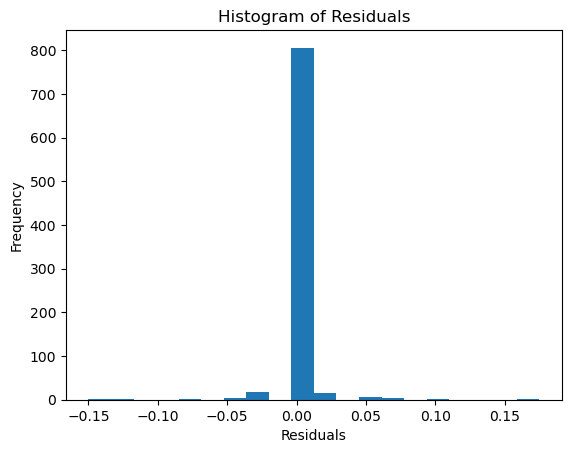

Mean Squared Error (MSE): 4.842896801460131e-05
Root Mean Squared Error (RMSE): 0.0069590924706172215
Mean Absolute Error (MAE): 0.0023407113824589695
R-squared (R2): 0.9869227732154353


C:\Users\Aishwarya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


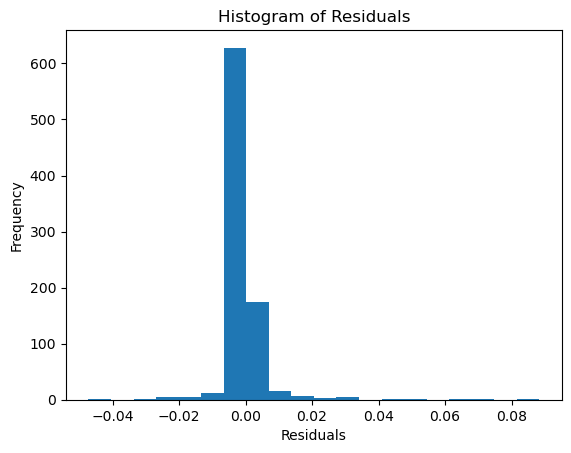

Mean Squared Error (MSE): 0.0001194001254157859
Root Mean Squared Error (RMSE): 0.010927036442502876
Mean Absolute Error (MAE): 0.002793474426182127
R-squared (R2): 0.9677585011165852


C:\Users\Aishwarya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


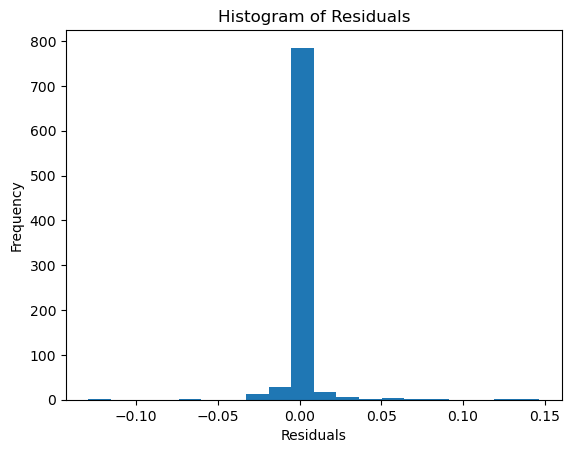

rfr
Mean Squared Error (MSE): 0.00015249171002906981
Root Mean Squared Error (RMSE): 0.01234875337955495
Mean Absolute Error (MAE): 0.0027132267441862703
R-squared (R2): 0.9588228129450337


C:\Users\Aishwarya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


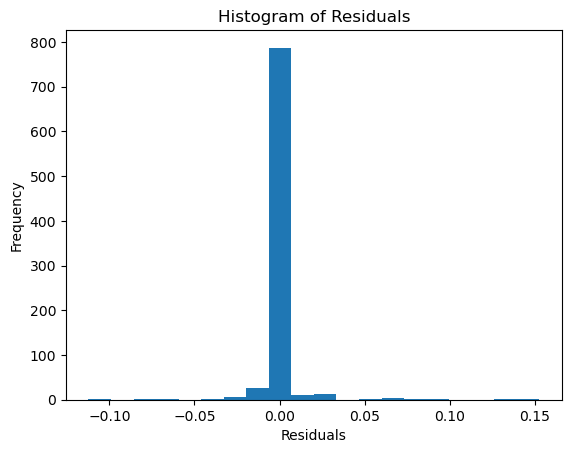

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df_trans_filtered = log_processor.transformed_data()

# Specify the feature columns and target column
feature_cols = ["Quantile_Transformed_actual_download_usage", "Quantile_Transformed_actual_cpu_usage",
                "Quantile_Transformed_actual_pid_usage", "Quantile_Transformed_actual_memory_usage",]
target_col = "avg_weight"

class RegressionModel:
    def __init__(self, dataframe, feature_cols, target_col):
        self.dataframe = dataframe
        self.X = self.dataframe[feature_cols]
        self.y = self.dataframe[target_col]
        self.model = None

    def preprocess_data(self):
        imputer = SimpleImputer(strategy='median')
        self.X = imputer.fit_transform(self.X)

    def split_data(self, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )

    def train_model(self):
        raise NotImplementedError("train_model() method must be implemented in a subclass.")

    def evaluate_model(self):
        y_pred = self.model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        mae = mean_absolute_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)

        residuals = self.y_test - y_pred

        print("Mean Squared Error (MSE):", mse)
        print("Root Mean Squared Error (RMSE):", rmse)
        print("Mean Absolute Error (MAE):", mae)
        print("R-squared (R2):", r2)

        # Plot histogram of residuals
        plt.hist(residuals, bins=20)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Histogram of Residuals')
        plt.show()

class DecisionTreeRegression(RegressionModel):
    def train_model(self):
        self.model = DecisionTreeRegressor()
        self.model.fit(self.X_train, self.y_train)

class GradientBoostingRegression(RegressionModel):
    def train_model(self):
        self.model = GradientBoostingRegressor()
        self.model.fit(self.X_train, self.y_train)

class HistGradientBoostingRegression(RegressionModel):
    def train_model(self):
        self.model = HistGradientBoostingRegressor()
        self.model.fit(self.X_train, self.y_train)

class RandomForestRegression(RegressionModel):
    def train_model(self):
        self.model = RandomForestRegressor()
        self.model.fit(self.X_train, self.y_train)

class SVRRegression(RegressionModel):
    def train_model(self):
        self.model = SVR()
        self.model.fit(self.X_train, self.y_train)

# Create an instance of the DecisionTreeRegression class
dt_regressor = DecisionTreeRegression(df_trans_filtered, feature_cols, target_col)
dt_regressor.preprocess_data()
dt_regressor.split_data()
dt_regressor.train_model()
dt_regressor.evaluate_model()

# Create an instance of the GradientBoostingRegression class
gb_regressor = GradientBoostingRegression(df_trans_filtered, feature_cols, target_col)
gb_regressor.preprocess_data()
gb_regressor.split_data()
gb_regressor.train_model()
gb_regressor.evaluate_model()

# Create an instance of the HistGradientBoostingRegression class
hist_gb_regressor = HistGradientBoostingRegression(df_trans_filtered, feature_cols, target_col)
hist_gb_regressor.preprocess_data()
hist_gb_regressor.split_data()
hist_gb_regressor.train_model()
hist_gb_regressor.evaluate_model()

# Create an instance of the RandomForestRegression class
print("rfr")
rf_regressor = RandomForestRegression(df_trans_filtered, feature_cols, target_col)
rf_regressor.preprocess_data()
rf_regressor.split_data()
rf_regressor.train_model()
rf_regressor.evaluate_model()

